In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as web
from arch import arch_model

In [2]:
# Get data
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()

In [3]:
returns.head

<bound method NDFrame.head of Date
2000-01-04   -3.834467
2000-01-05    0.192218
2000-01-06    0.095568
2000-01-07    2.709040
2000-01-10    1.118997
                ...   
2013-12-24    0.291575
2013-12-26    0.474553
2013-12-27   -0.033658
2013-12-30   -0.017925
2013-12-31    0.395968
Name: Adj Close, Length: 3520, dtype: float64>

In [18]:
#  Using the constructor function arch_model()
am_c = arch_model(returns)
res_c = am_c.fit()
print(res_c.summary)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 68805887221245.24
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1772131465.7584665
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5194.449310137734
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5190.74240547728
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5191.56991380699
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5150.829243838731
Iteration:      7,   Func. Count:     46,   Neg. LLF: 6474.490299000203
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5143.161813251834
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5141.392119858983
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5141.390235767258
Iteration:     11,   Func. Count:     69,   Neg. LLF: 5141.390230505547
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5141.390230506788
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5141.390230505547
            Iterations: 12
  

In [19]:
# The  same model can be manually assembled from the building blocks of an ARCH model
from arch.univariate import ConstantMean, GARCH, Normal

am_m = ConstantMean(returns)
am_m.volatility = GARCH(1, 0, 1)
am_m.distribution = Normal()
res_m = am_m.fit()
print(res_m.summary)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 68805887221245.24
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1772131465.7584665
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5194.449310137734
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5190.74240547728
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5191.56991380699
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5150.829243838731
Iteration:      7,   Func. Count:     46,   Neg. LLF: 6474.490299000203
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5143.161813251834
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5141.392119858983
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5141.390235767258
Iteration:     11,   Func. Count:     69,   Neg. LLF: 5141.390230505547
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5141.390230506788
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5141.390230505547
            Iterations: 12
  

In [26]:
# The  same model can be manually assembled from the building blocks of an ARCH model
from arch.univariate import ConstantMean, HARX, FIGARCH, Normal, GeneralizedError, SkewStudent

# Model 1
am1 = ConstantMean(returns)
am1.volatility = FIGARCH(1, 1, 2)
am1.distribution = Normal()
# Model 2
am2 = HARX(returns)
am2.volatility = FIGARCH(1, 1, 2)
am2.distribution = SkewStudent()
# Model 3
am3 = HARX(returns)
am3.volatility = FIGARCH(1, 1, 2)
am3.distribution = GeneralizedError()

In [31]:
res1 = am1.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 27678.32342033817
Iteration:      2,   Func. Count:     18,   Neg. LLF: 27592.777857867746
Iteration:      3,   Func. Count:     28,   Neg. LLF: 27395.804381119277
Iteration:      4,   Func. Count:     35,   Neg. LLF: 5184.428640403369
Iteration:      5,   Func. Count:     42,   Neg. LLF: 27009.01357488509
Iteration:      6,   Func. Count:     49,   Neg. LLF: 5130.793735759461
Iteration:      7,   Func. Count:     55,   Neg. LLF: 5247.455123232973
Iteration:      8,   Func. Count:     62,   Neg. LLF: 5146.006759449604
Iteration:      9,   Func. Count:     70,   Neg. LLF: 5149.421602738685
Iteration:     10,   Func. Count:     77,   Neg. LLF: 5132.725205980487
Iteration:     11,   Func. Count:     84,   Neg. LLF: 5129.544930416361
Iteration:     12,   Func. Count:     90,   Neg. LLF: 5129.541949418928
Iteration:     13,   Func. Count:     96,   Neg. LLF: 5129.541012856949
Iteration:     14,   Func. Count:    102,   Neg. LLF: 5129.541

In [30]:
res2 = am2.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 28494.46480977717
Iteration:      2,   Func. Count:     22,   Neg. LLF: 298191.5293586387
Iteration:      3,   Func. Count:     31,   Neg. LLF: 100873.67053036638
Iteration:      4,   Func. Count:     40,   Neg. LLF: 27205.266026438563
Iteration:      5,   Func. Count:     50,   Neg. LLF: 188362.44293282233
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5113.794158072038
Iteration:      7,   Func. Count:     69,   Neg. LLF: 5124.439056719394
Iteration:      8,   Func. Count:     78,   Neg. LLF: 5075.9371337686
Iteration:      9,   Func. Count:     86,   Neg. LLF: 5076.518616549091
Iteration:     10,   Func. Count:     95,   Neg. LLF: 5089.017815974539
Iteration:     11,   Func. Count:    104,   Neg. LLF: 5075.501798389672
Iteration:     12,   Func. Count:    113,   Neg. LLF: 5075.632402203095
Iteration:     13,   Func. Count:    122,   Neg. LLF: 5075.347533308182
Iteration:     14,   Func. Count:    130,   Neg. LLF: 5075.3469

In [32]:
res3 = am3.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 27021.339035554618
Iteration:      2,   Func. Count:     20,   Neg. LLF: 16614.939591435512
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25619.061604274342
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5149.753560183696
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5120.979707183243
Iteration:      6,   Func. Count:     53,   Neg. LLF: 26313.025695598964
Iteration:      7,   Func. Count:     61,   Neg. LLF: 5154.911743013642
Iteration:      8,   Func. Count:     69,   Neg. LLF: 5075.604191300198
Iteration:      9,   Func. Count:     76,   Neg. LLF: 5076.462698177078
Iteration:     10,   Func. Count:     84,   Neg. LLF: 5165.224000709553
Iteration:     11,   Func. Count:     93,   Neg. LLF: 5100.214478412365
Iteration:     12,   Func. Count:    101,   Neg. LLF: 5075.235491980184
Iteration:     13,   Func. Count:    108,   Neg. LLF: 5075.228022404792
Iteration:     14,   Func. Count:    115,   Neg. LLF: 5075.2

In [33]:
print(
    res1.aic,
    res2.aic,
    res3.aic
)

10269.08201861052 10164.69379953167 10162.455389750688


In [34]:
res3.conditional_volatility

Date
2000-01-04    1.634604
2000-01-05    1.647167
2000-01-06    2.007865
2000-01-07    1.977605
2000-01-10    1.864133
                ...   
2013-12-24    0.778832
2013-12-26    0.748078
2013-12-27    0.707316
2013-12-30    0.676096
2013-12-31    0.638291
Name: cond_vol, Length: 3520, dtype: float64

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\arch\univariate\base.py:1618: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plot_fn(x_values, y_values, linestyle="-", marker="")
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\arch\univariate\base.py:1631: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  line = plot_fn(temp_x, temp_y, linewidth=3, linestyle="-", marker="")


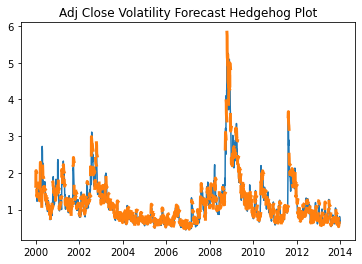

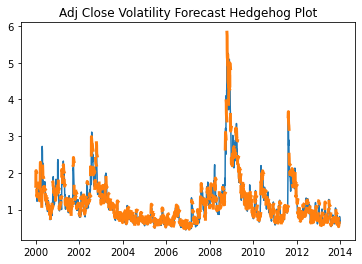

In [37]:
res3.hedgehog_plot()

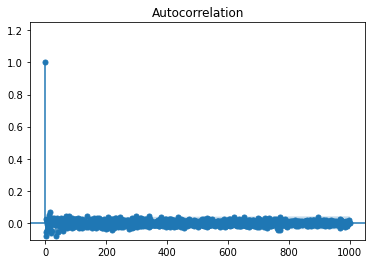

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

ax = plot_acf(returns, auto_ylims=True, lags=1000)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

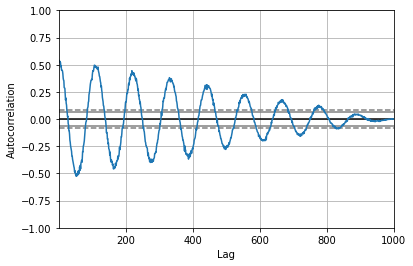

In [45]:
import numpy as np
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
s = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
pd.plotting.autocorrelation_plot(s)


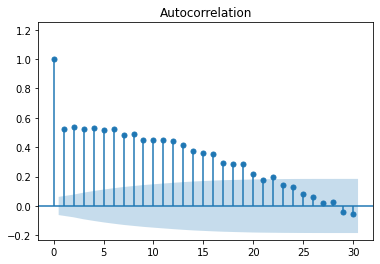

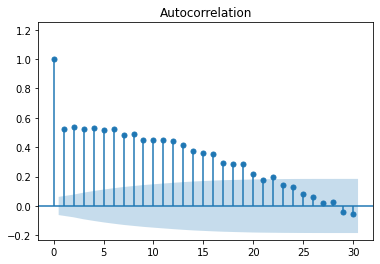

In [48]:
plot_acf(s, auto_ylims=True)